In [1]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from collections import namedtuple
import networkx as nx
import random

In [100]:
%run ../modules/utils.ipynb
%run ../modules/cds.ipynb
%run ../modules/preprocessing.ipynb

(5933, 13)


<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>

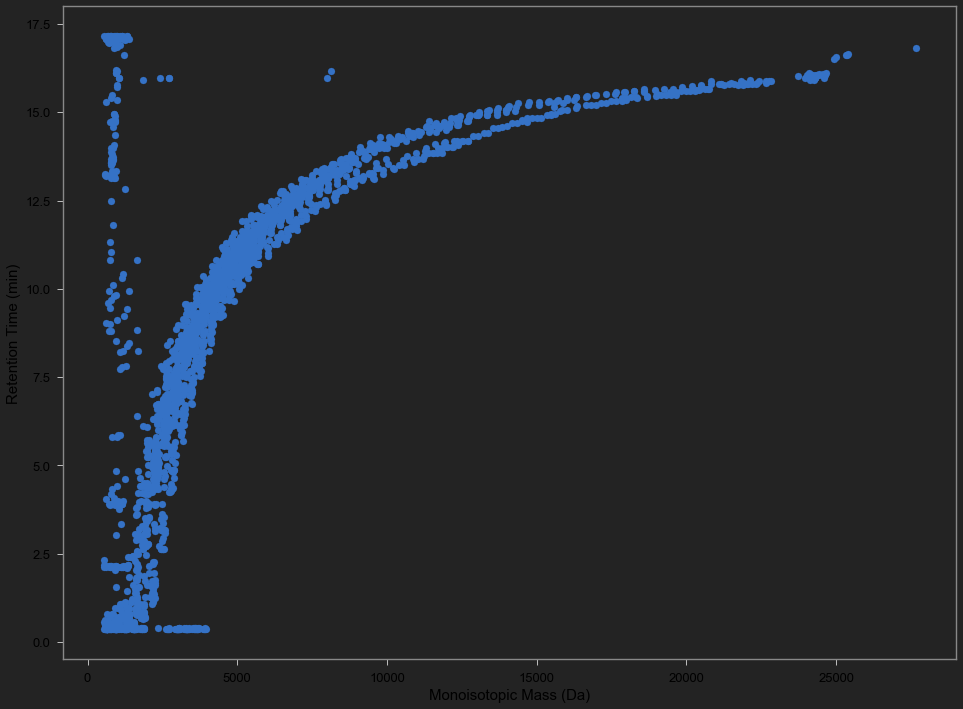

In [91]:
df_phe = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/tRNA_Phe_0724.xlsx')
print(df_phe.shape)
df_phe = thermo_df(df_phe)
df_phe = df_phe[df_phe.Vol > 1E5]
plot_zone(df_phe)

# Split 3' and 5' Dots

In [7]:
idxs = list()
# create our callback function
def on_selection(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

def on_click(trace, points, selector):
#     print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

df_sample = df_phe[df_phe.Mass < 25000]
f = zone_selection(df_sample, on_selection=on_selection, on_click=on_click)
f

FigureWidget({
    'data': [{'marker': {'color': [#6371f2, #6371f2, #6371f2, ..., #6371f2,
                   …

points [2, 5, 6, 7, 9, 13, 16, 18, 19, 20, 21, 22, 25, 26, 28, 30, 35, 36, 38, 39, 47, 48, 51, 53, 58, 59, 61, 65, 66, 67, 68, 71, 73, 78, 79, 80, 85, 86, 88, 91, 94, 95, 97, 101, 102, 106, 108, 110, 111, 118, 123, 126, 130, 146, 155, 167, 172, 180, 181, 183, 187, 188, 200, 201, 215, 217, 219, 231, 244, 249, 259, 273, 284, 290, 301, 305, 308, 310, 313, 314, 315, 318, 330, 334, 335, 345, 359, 370, 376, 381, 389, 398, 416, 420, 423, 424, 426, 430, 436, 437, 440, 441, 448, 449, 450, 451, 452, 456, 458, 463, 465, 466, 467, 470, 471, 472, 479, 480, 481, 482, 488, 491, 496, 500, 505, 510, 513, 514, 521, 522, 531, 532, 534, 542, 544, 545, 548, 549, 555, 558, 559, 562, 568, 569, 571, 572, 575, 576, 577, 578, 585, 587, 589, 591, 594, 596, 598, 600, 605, 609, 611, 614, 616, 621, 622, 630, 632, 636, 637, 639, 640, 641, 643, 646, 648, 650, 653, 658, 659, 661, 665, 671, 672, 676, 677, 679, 680, 681, 684, 685, 687, 689, 691, 692, 694, 696, 699, 700, 706, 711, 713, 716, 717, 718, 720, 722, 725, 726, 

In [8]:
df_chosen = df_sample.iloc[idxs]
df_chosen.shape

(2192, 3)

In [6]:
df_5p = df_chosen
df_5p.shape

(3660, 3)

In [9]:
df_3p = df_chosen
df_3p.shape

(2192, 3)

# Put&Get Splitted Ladder

In [34]:
df_5p.to_excel('/Users/bryan/Downloads/phe5p.xlsx')
df_3p.to_excel('/Users/bryan/Downloads/phe3p.xlsx')

In [108]:
df_5p = pd.read_excel('/Users/bryan/Downloads/phe5p.xlsx')
df_3p = pd.read_excel('/Users/bryan/Downloads/phe3p.xlsx')
df_5p.shape, df_3p.shape

((3660, 4), (2192, 4))

# 25k Dots and their connections

In [93]:
df_phe_25k = df_phe[(df_phe.Mass > 23500) & (df_phe.Mass < 25000) & (df_phe.Vol > 1E6)]
px.scatter(x=df_phe_25k.Mass, y=df_phe_25k.Vol)

# Generate ladders by MassSum

In [109]:
df_3p = df_3p[df_3p.Vol>1E5]
df_5p = df_5p[df_5p.Vol>1E5]
df_3p.shape, df_5p.shape

((1000, 4), (1592, 4))

<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>

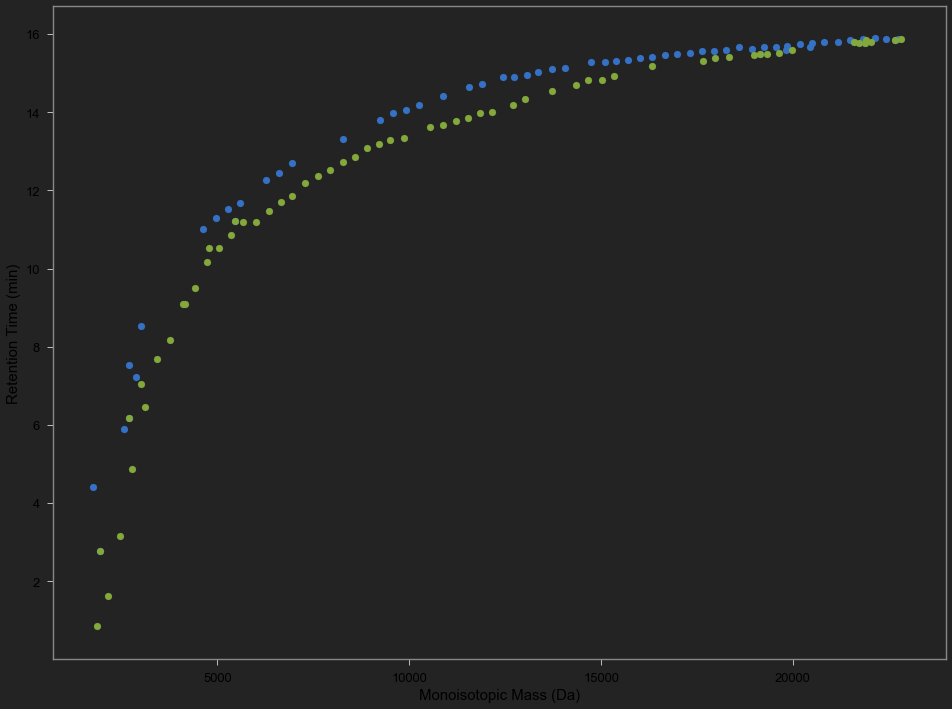

In [110]:
full_mass = 24581.374101 
df_3p_cca, df_5p_cca = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)
plot_zones(df_5p_cca, df_3p_cca)

# Refine 5' ladder

In [111]:
idxs = list()
# create our callback function
def on_selection(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

def on_click(trace, points, selector):
#     print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

df_sample = df_5p_cca
f = zone_selection(df_sample, on_selection=on_selection, on_click=on_click)
f

FigureWidget({
    'data': [{'marker': {'color': [#6371f2, #6371f2, #6371f2, #6371f2, #6371f2,
               …

In [119]:
df_chosen = df_sample.iloc[idxs]
df_5p_cca_ref = df_sample.drop(df_chosen.index)
df_5p_cca_ref.shape
# plot_zone(df_5p_cca_ref)
px.scatter(df_5p_cca_ref, x='Mass', y='RT')

# Mutual Verification

In [66]:
df_5p_cca_ref['Hit'] = 0
len = df_5p_cca_ref.shape[0]
for i in range(len):
    print('Processing {}'.format(df_5p_cca_ref.iloc[i].Mass))
    count = 0
    j_pool = set()
    N = 5 if i > 3 else 2
    while count < N:
        j = random.randint(0, len-1)
        if j == i or j in j_pool:
            continue
#         print('i {} j {}, len {}'.format(i, j, len))
        diff = abs(df_5p_cca_ref.iloc[i].Mass - df_5p_cca_ref.iloc[j].Mass)
        if diff < 400 or diff > 3000:
            continue
            
        j_pool.add(j)
        
        print('--handle Mass {}'.format( df_5p_cca_ref.iloc[j].Mass))
        df_condidates = components(diff)
        print(df_condidates)
        if not df_condidates.empty:
            print('Hit index {}.'.format(i))
            df_5p_cca_ref['Hit'].iloc[i] += 1
        
        count += 1

print(df_5p_cca_ref)
    

Processing 21167.8778289678
--handle Mass 22131.9778455539
Name  A  C  G  U  D  Methyl      Mass  MassDiff
306   2  0  0  1  0       0  964.1303 -0.030283
Hit index 0.
--handle Mass 20449.8422714553
Name  A  C  G  U  D  Methyl     Mass  MassDiff
47    0  0  2  0  0       2  718.126 -0.090442
Hit index 0.


/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



--handle Mass 21585.0843179679
Empty DataFrame
Columns: [A, C, G, U, D, Methyl, Mass, MassDiff]
Index: []
--handle Mass 19859.681503751
Name  A  C  G  U  D  Methyl       Mass  MassDiff
239   0  1  1  0  2       3  1308.2175 -0.021175
804   2  1  1  0  0       0  1308.1937  0.002625
Hit index 0.
--handle Mass 19554.6355833974
Name  A  C  G  U  D  Methyl       Mass  MassDiff
115   0  0  1  3  1       3  1613.2111  0.031146
495   0  2  1  0  2       3  1613.2588 -0.016554
1368  2  2  1  0  0       0  1613.2350  0.007246
1429  3  0  0  2  0       1  1613.2237  0.018546
Hit index 0.
Processing 7454.98641350123
--handle Mass 9925.34395169411
Name  A  C  G  U  D  Methyl       Mass  MassDiff
71    0  0  0  4  4       1  2470.2808  0.076738
996   0  2  0  1  5       1  2470.3285  0.029038
1797  0  6  0  2  0       2  2470.3296  0.027938
2355  1  1  0  6  0       0  2470.2456  0.111938
2870  1  3  0  3  1       0  2470.2933  0.064238
3080  1  5  0  0  2       0  2470.3410  0.016538
Hit index 1.


Name  A  C  G  U  D  Methyl       Mass  MassDiff
681   0  1  3  2  0       1  1966.2497  0.028232
1209  0  4  2  0  0       4  1966.3224 -0.044468
1777  1  1  2  1  1       2  1966.2861 -0.008168
2473  2  1  1  0  2       3  1966.3225 -0.044568
3180  4  1  1  0  0       0  1966.2987 -0.020768
Hit index 6.
--handle Mass 20463.872188818
Name  A  C  G  U  D  Methyl       Mass  MassDiff
765   2  0  2  0  0       1  1362.2154 -0.128153
Hit index 6.
--handle Mass 20188.7292600015
Name  A  C  G  U  D  Methyl       Mass  MassDiff
382   0  1  2  1  1       2  1637.2336 -0.003425
939   1  1  1  0  2       3  1637.2700 -0.039825
1504  3  1  1  0  0       0  1637.2462 -0.016025
Hit index 6.
Processing 21891.0823402671
--handle Mass 20463.872188818
Empty DataFrame
Columns: [A, C, G, U, D, Methyl, Mass, MassDiff]
Index: []
--handle Mass 20449.8422714553
Empty DataFrame
Columns: [A, C, G, U, D, Methyl, Mass, MassDiff]
Index: []
--handle Mass 20010.8012741591
Name  A  C  G  U  D  Methyl       Mass  Ma

Name  A  C  G  U  D  Methyl       Mass  MassDiff
14    0  0  0  0  7       4  2212.3494 -0.074991
572   0  1  1  3  2       2  2212.2778 -0.003391
1047  0  3  1  0  3       2  2212.3255 -0.051091
1415  1  0  1  1  4       0  2212.2892 -0.014791
1663  1  1  0  2  3       3  2212.3142 -0.039791
2186  2  0  0  0  5       1  2212.3256 -0.051191
2717  2  4  0  1  0       2  2212.3267 -0.052291
2920  3  1  0  2  1       0  2212.2904 -0.015991
Hit index 13.
Processing 22743.0644675686
--handle Mass 22131.9778455539
Name  A  C  G  U  D  Methyl      Mass  MassDiff
24    0  1  0  1  0       0  611.0666  0.020022
Hit index 14.
--handle Mass 20463.872188818
Name  A  C  G  U  D  Methyl       Mass  MassDiff
336   0  0  3  1  3       1  2279.3061 -0.113821
779   0  1  2  2  2       4  2279.3311 -0.138821
2047  1  0  2  0  4       2  2279.3425 -0.150221
2955  1  3  3  0  0       0  2279.3186 -0.126321
3631  2  1  2  2  0       1  2279.3073 -0.115021
3979  2  4  1  0  0       4  2279.3800 -0.187721
433

Name   A  C  G  U  D  Methyl       Mass  MassDiff
1635   0  1  5  0  3       3  2996.4481 -0.021039
8166   2  1  5  0  1       0  2996.4243  0.002761
8565   2  2  4  1  0       3  2996.4493 -0.022239
9652   3  0  3  3  0       4  2996.4380 -0.010939
10390  3  2  3  0  1       4  2996.4857 -0.058639
11075  4  0  2  2  1       5  2996.4744 -0.047339
13011  7  0  1  1  0       3  2996.4870 -0.059939
13150  8  0  0  0  1       4  2996.5234 -0.096339
Hit index 21.
--handle Mass 10254.3980414777
Name  A  C  G  U  D  Methyl       Mass  MassDiff
2637  2  2  2  0  0       2  1986.3136  0.002012
2823  3  0  1  2  0       3  1986.3023  0.013312
3079  4  0  0  1  1       4  1986.3387 -0.023088
Hit index 21.
--handle Mass 6764.90706504162
Empty DataFrame
Columns: [A, C, G, U, D, Methyl, Mass, MassDiff]
Index: []
--handle Mass 9925.34395169411
Name  A  C  G  U  D  Methyl       Mass  MassDiff
1070  1  2  2  0  0       2  1657.2611  0.000422
1219  2  0  1  2  0       3  1657.2498  0.011722
Hit index 2

Name  A  C  G  U  D  Methyl       Mass  MassDiff
88    0  0  0  4  5       4  2820.3686  0.009073
973   0  1  1  0  7       1  2820.3913 -0.013627
1082  0  1  1  7  0       2  2820.2970  0.080673
1504  0  2  0  1  6       4  2820.4163 -0.038627
2168  0  3  1  4  1       2  2820.3447  0.032973
2453  0  4  0  5  0       5  2820.3697  0.007973
2744  0  5  1  1  2       2  2820.3924 -0.014727
2873  0  6  0  2  1       5  2820.4174 -0.039727
3276  1  0  1  5  2       0  2820.3084  0.069273
3801  1  1  0  6  1       3  2820.3334  0.044273
4350  1  2  1  2  3       0  2820.3561  0.021573
4647  1  3  0  3  2       3  2820.3811 -0.003427
5055  1  5  0  0  3       3  2820.4288 -0.051127
5329  2  0  0  4  3       1  2820.3448  0.032873
6169  2  2  0  1  4       1  2820.3925 -0.014827
7698  3  3  0  3  0       0  2820.3573  0.020373
7830  3  5  0  0  1       0  2820.4050 -0.027327
Hit index 25.
Processing 6253.8793245261
--handle Mass 7102.95019556842
Empty DataFrame
Columns: [A, C, G, U, D, Methy

Name  A  C  G  U  D  Methyl       Mass  MassDiff
219   0  0  1  6  1       4  2545.3026  0.025126
781   0  1  2  2  3       1  2545.3253  0.002426
1119  0  2  1  3  2       4  2545.3503 -0.022574
1594  0  4  1  0  3       4  2545.3980 -0.070274
2387  1  1  1  1  4       2  2545.3617 -0.033974
3060  1  4  2  1  0       0  2545.3378 -0.010074
3478  2  1  0  0  5       3  2545.3981 -0.070374
3796  2  2  1  3  0       1  2545.3265  0.001226
3981  2  4  1  0  1       1  2545.3742 -0.046474
4009  2  5  0  1  0       4  2545.3992 -0.071474
4092  3  0  0  5  0       2  2545.3152  0.012526
4442  3  2  0  2  1       2  2545.3629 -0.035174
4740  4  1  0  0  3       0  2545.3743 -0.046574
Hit index 31.
Processing 14040.9053091197
--handle Mass 16673.2646548112
Name  A  C  G  U  D  Methyl       Mass  MassDiff
614   0  0  4  4  0       2  2632.3220  0.037346
1892  0  2  4  1  1       2  2632.3697 -0.010354
2291  0  3  3  2  0       5  2632.3947 -0.035354
3471  1  0  3  3  1       3  2632.3584  0.000

Name  A  C  G  U  D  Methyl       Mass  MassDiff
694   0  5  1  0  0       2  1898.2851  -0.03634
804   1  0  1  4  0       0  1898.2011   0.04766
1060  1  2  1  1  1       0  1898.2488  -0.00004
1107  1  3  0  2  0       3  1898.2738  -0.02504
1185  2  0  0  3  1       1  1898.2375   0.01126
1353  2  2  0  0  2       1  1898.2852  -0.03644
Hit index 36.
Processing 15092.0481080063
--handle Mass 16673.2646548112
Name  A  C  G  U  D  Methyl       Mass  MassDiff
365   0  2  1  2  0       1  1581.1962  0.020347
490   1  0  0  4  0       2  1581.1849  0.031647
662   1  2  0  1  1       2  1581.2326 -0.016053
Hit index 37.
--handle Mass 13726.896270523
Empty DataFrame
Columns: [A, C, G, U, D, Methyl, Mass, MassDiff]
Index: []
--handle Mass 17950.3846860908
Name  A  C  G  U  D  Methyl       Mass  MassDiff
337   0  0  2  1  6       1  2858.3817 -0.045122
1012  0  1  1  2  5       4  2858.4067 -0.070122
1790  0  2  2  5  0       2  2858.3351  0.001478
2570  0  4  2  2  1       2  2858.3828 -0.

Name  A  C  G  U  D  Methyl       Mass  MassDiff
541   1  0  2  1  0       1  1339.1882  0.004281
746   2  0  1  0  1       2  1339.2246 -0.032119
Hit index 41.
--handle Mass 12437.7079581601
Name   A  C  G  U  D  Methyl       Mass  MassDiff
639    0  0  4  1  4       3  2960.4257 -0.038294
2935   0  3  5  1  0       1  2960.4018 -0.014394
4468   1  0  3  0  5       4  2960.4621 -0.074694
5366   1  1  4  3  0       2  2960.3905 -0.003094
6338   1  3  4  0  1       2  2960.4382 -0.050794
6629   1  4  3  1  0       5  2960.4632 -0.075794
7548   2  0  4  1  2       0  2960.4019 -0.014494
8079   2  1  3  2  1       3  2960.4269 -0.039494
9601   3  0  3  0  3       1  2960.4383 -0.050894
10006  3  1  2  1  2       4  2960.4633 -0.075894
11315  4  1  1  0  3       5  2960.4997 -0.112294
12301  5  1  2  1  0       1  2960.4395 -0.052094
12794  6  1  1  0  1       2  2960.4759 -0.088494
12869  6  2  0  1  0       5  2960.5009 -0.113494
Hit index 41.
--handle Mass 14040.9053091197
Name  A  C  G

Name  A  C  G  U  D  Methyl       Mass  MassDiff
150   0  0  2  1  2       2  1640.2333 -0.066851
767   1  0  1  0  3       3  1640.2697 -0.103251
1444  3  0  1  0  1       0  1640.2459 -0.079451
1495  3  1  0  1  0       3  1640.2709 -0.104451
Hit index 46.
--handle Mass 13726.896270523
Name  A  C  G  U  D  Methyl       Mass  MassDiff
351   0  0  3  2  2       1  2277.2904  0.008517
794   0  1  2  3  1       4  2277.3154 -0.016483
1434  0  3  2  0  2       4  2277.3631 -0.064183
2062  1  0  2  1  3       2  2277.3268 -0.027883
3243  2  0  1  0  4       3  2277.3632 -0.064283
3926  2  3  2  0  0       1  2277.3393 -0.040383
4342  3  1  1  2  0       2  2277.3280 -0.029083
4640  4  0  1  0  2       0  2277.3394 -0.040483
4753  4  1  0  1  1       3  2277.3644 -0.065483
Hit index 46.
--handle Mass 18772.5885405856
Name  A  C  G  U  D  Methyl       Mass  MassDiff
48    0  0  0  2  7       0  2768.3376  0.055753
157   0  0  0  9  0       1  2768.2433  0.150053
1585  0  2  0  6  1       1  

Empty DataFrame
Columns: [A, C, G, U, D, Methyl, Mass, MassDiff]
Index: []
--handle Mass 8268.08242928899
Name  A  C  G  U  D  Methyl       Mass  MassDiff
670   1  2  1  0  0       2  1312.2137 -0.001712
731   2  0  0  2  0       3  1312.2024  0.009588
Hit index 50.
--handle Mass 10254.3980414777
Name  A  C  G  U  D  Methyl      Mass  MassDiff
120   1  0  1  0  0       0  674.0999  0.003724
Hit index 50.
Processing 16673.2646548112
--handle Mass 15703.1418825169
Name  A  C  G  U  D  Methyl      Mass  MassDiff
130   0  1  1  1  0       1  970.1296 -0.006828
257   1  1  0  0  1       2  970.1660 -0.043228
Hit index 51.
--handle Mass 19249.5874826835
Name  A  C  G  U  D  Methyl       Mass  MassDiff
351   0  0  2  2  4       3  2576.3562 -0.033372
2287  0  3  3  2  0       1  2576.3323 -0.009472
2920  0  6  2  0  0       4  2576.4050 -0.082172
3202  1  0  1  1  5       4  2576.3926 -0.069772
3992  1  1  2  4  0       2  2576.3210  0.001828
4766  1  3  2  1  1       2  2576.3687 -0.045872
4

Name   A  C  G  U  D  Methyl       Mass  MassDiff
585    0  0  3  5  1       3  2915.3565  0.139398
1560   0  1  4  1  3       0  2915.3792  0.116698
2235   0  2  3  2  2       3  2915.4042  0.091698
4414   1  0  2  4  2       4  2915.3929  0.102998
5227   1  1  3  0  4       1  2915.4156  0.080298
5758   1  2  2  1  3       4  2915.4406  0.055298
7265   2  0  1  3  3       5  2915.4293  0.066598
8339   2  2  1  0  4       5  2915.4770  0.018898
8526   2  2  3  2  0       0  2915.3804  0.115498
9159   2  5  2  0  0       3  2915.4531  0.042798
9577   3  0  2  4  0       1  2915.3691  0.126798
10351  3  2  2  1  1       1  2915.4168  0.079098
10552  3  3  1  2  0       4  2915.4418  0.054098
11000  4  0  1  3  1       2  2915.4055  0.090398
11291  4  1  0  4  0       5  2915.4305  0.065398
11570  4  2  1  0  2       2  2915.4532  0.042698
11705  4  3  0  1  1       5  2915.4782  0.017698
11925  5  0  0  2  2       3  2915.4419  0.053998
12972  7  0  0  2  0       0  2915.4181  0.077798


Name  A  C  G  U  D  Methyl       Mass  MassDiff
169   0  0  2  3  0       1  1622.1863 -0.029458
529   0  2  2  0  1       1  1622.2340 -0.077158
790   1  0  1  2  1       2  1622.2227 -0.065858
1163  2  0  0  1  2       3  1622.2591 -0.102258
1552  4  0  0  1  0       0  1622.2353 -0.078458
Hit index 59.
--handle Mass 19843.7058220567
Name  A  C  G  U  D  Methyl       Mass  MassDiff
117   0  0  1  3  2       1  1893.2209  0.100236
497   0  2  1  0  3       1  1893.2686  0.052536
734   1  0  0  2  3       2  1893.2573  0.063836
1393  2  3  0  1  0       1  1893.2698  0.051336
Hit index 59.
--handle Mass 16004.1951876148
Name  A  C  G  U  D  Methyl       Mass  MassDiff
232   0  0  2  2  2       2  1946.2586 -0.069102
1413  1  0  1  1  3       3  1946.2950 -0.105502
2184  2  0  0  0  4       4  1946.3314 -0.141902
2687  2  3  1  0  0       2  1946.3075 -0.118002
2810  3  0  1  1  1       0  1946.2712 -0.081702
2918  3  1  0  2  0       3  1946.2962 -0.106702
3061  4  0  0  0  2       1 

Name  A  C  G  U  D  Methyl      Mass  MassDiff
232   1  0  1  1  0       1  994.1408  0.000974
302   2  0  0  0  1       2  994.1772 -0.035426
Hit index 64.
--handle Mass 20188.7292600015
Name  A  C  G  U  D  Methyl       Mass  MassDiff
174   0  0  1  4  1       4  1933.2520  0.031551
596   0  1  2  0  3       1  1933.2747  0.008851
844   0  2  1  1  2       4  1933.2997 -0.016149
2621  2  2  1  1  0       1  1933.2759  0.007651
2777  3  0  0  3  0       2  1933.2646  0.018951
2987  3  2  0  0  1       2  1933.3123 -0.028749
Hit index 64.
--handle Mass 19554.6355833974
Name  A  C  G  U  D  Methyl       Mass  MassDiff
617   1  1  1  1  0       1  1299.1821  0.007774
786   2  1  0  0  1       2  1299.2185 -0.028626
Hit index 64.
--handle Mass 16004.1951876148
Name  A  C  G  U  D  Methyl       Mass  MassDiff
777   0  1  2  2  2       2  2251.2999 -0.049379
2045  1  0  2  0  4       0  2251.3113 -0.060779
2383  1  1  1  1  3       3  2251.3363 -0.085779
3474  2  1  0  0  4       4  2251.3

Name  A  C  G  U  D  Methyl       Mass  MassDiff
1270  0  2  5  0  0       0  2335.3196  0.177235
2206  1  0  4  2  0       1  2335.3083  0.188535
2959  1  3  3  0  0       4  2335.3810  0.115835
3392  2  0  3  1  1       2  2335.3447  0.152135
4163  3  0  2  0  2       3  2335.3811  0.115735
4975  5  0  2  0  0       0  2335.3573  0.139535
5124  6  1  0  0  0       4  2335.4187  0.078135
Hit index 68.
--handle Mass 17644.361636498
Name  A  C  G  U  D  Methyl       Mass  MassDiff
78    0  0  1  0  4       2  1605.2426 -0.016754
624   0  3  2  0  0       0  1605.2187  0.007146
957   1  1  1  2  0       1  1605.2074  0.018446
1286  2  1  0  1  1       2  1605.2438 -0.017954
Hit index 68.
Processing 10254.3980414777
--handle Mass 10879.4821999753
Name  A  C  G  U  D  Methyl      Mass  MassDiff
25    0  1  0  1  0       1  625.0822  0.001958
Hit index 69.
--handle Mass 11896.6424081803
Name  A  C  G  U  D  Methyl       Mass  MassDiff
138   0  0  2  0  3       2  1642.2490 -0.004633
1318  2

Name  A  C  G  U  D  Methyl       Mass  MassDiff
240   1  0  2  0  0       0  1019.1473  0.000329
Hit index 73.
--handle Mass 9251.2431191281
Name  A  C  G  U  D  Methyl       Mass  MassDiff
218   0  0  2  1  3       3  1962.2899  0.014409
1399  1  0  1  0  4       4  1962.3263 -0.021991
2082  1  3  2  0  0       2  1962.3024  0.001909
2330  2  0  2  1  1       0  1962.2661  0.038209
2498  2  1  1  2  0       3  1962.2911  0.013209
2796  3  0  1  0  2       1  1962.3025  0.001809
2909  3  1  0  1  1       4  1962.3275 -0.023191
Hit index 73.
--handle Mass 6614.83807941993
Name  A  C  G  U  D  Methyl      Mass  MassDiff
120   1  0  1  0  0       0  674.0999   0.00083
Hit index 73.
Processing 20010.8012741591
--handle Mass 20743.8971263771
Empty DataFrame
Columns: [A, C, G, U, D, Methyl, Mass, MassDiff]
Index: []
--handle Mass 21825.9594354813
Empty DataFrame
Columns: [A, C, G, U, D, Methyl, Mass, MassDiff]
Index: []
--handle Mass 22338.0786178543
Name  A  C  G  U  D  Methyl       Mass  

Name  A  C  G  U  D  Methyl       Mass  MassDiff
10    0  0  0  0  5       2  1568.2362 -0.031782
264   0  1  1  3  0       0  1568.1646  0.039818
412   0  3  1  0  1       0  1568.2123 -0.007882
435   0  4  0  1  0       3  1568.2373 -0.032882
597   1  1  0  2  1       1  1568.2010  0.003418
Hit index 79.
--handle Mass 18772.5885405856
Name  A  C  G  U  D  Methyl       Mass  MassDiff
199   0  0  3  1  1       3  1691.2553  0.028348
1465  3  0  2  0  0       1  1691.2679  0.015748
Hit index 79.
--handle Mass 17950.3846860908
Name  A  C  G  U  D  Methyl       Mass  MassDiff
146   0  0  1  1  6       1  2513.3343  0.153203
589   0  1  0  2  5       4  2513.3593  0.128203
1132  0  2  1  5  0       2  2513.2877  0.199803
1617  0  4  1  2  1       2  2513.3354  0.152103
1857  1  0  0  0  7       2  2513.3707  0.116803
2415  1  1  1  3  2       0  2513.2991  0.188403
2658  1  2  0  4  1       3  2513.3241  0.163403
2890  1  3  1  0  3       0  2513.3468  0.140703
3003  1  4  0  1  2       3 

In [69]:
df_5p_cca_ref[df_5p_cca_ref.Hit<=2].sort_values('Mass')

,Unnamed: 0,Mass,RT,Vol,Hit
375,1116,1931.244152,5.266764,1196.97,2
2259,4089,6253.879325,12.304176,21299.51,2
2266,4096,6269.791181,12.273041,5852482.61,2
2564,4478,7454.986414,12.898004,50349.79,2
3160,5246,11567.582524,14.649057,4767691.16,1
3553,5744,20010.801274,15.669279,22884.22,1
3567,5758,20455.873649,15.699472,8972.32,1
3577,5768,20743.897126,15.734734,20688.30,2
3591,5782,21496.916494,15.840306,649895.16,2
3592,5783,21585.084318,15.805322,581348.45,1


In [47]:
components(918.0750643431002)

Name,A,C,G,U,D,Methyl,Mass,MassDiff
24,0,0,0,3,0,0,918.0759,-0.000836
90,0,2,0,0,1,0,918.1236,-0.048536


<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>

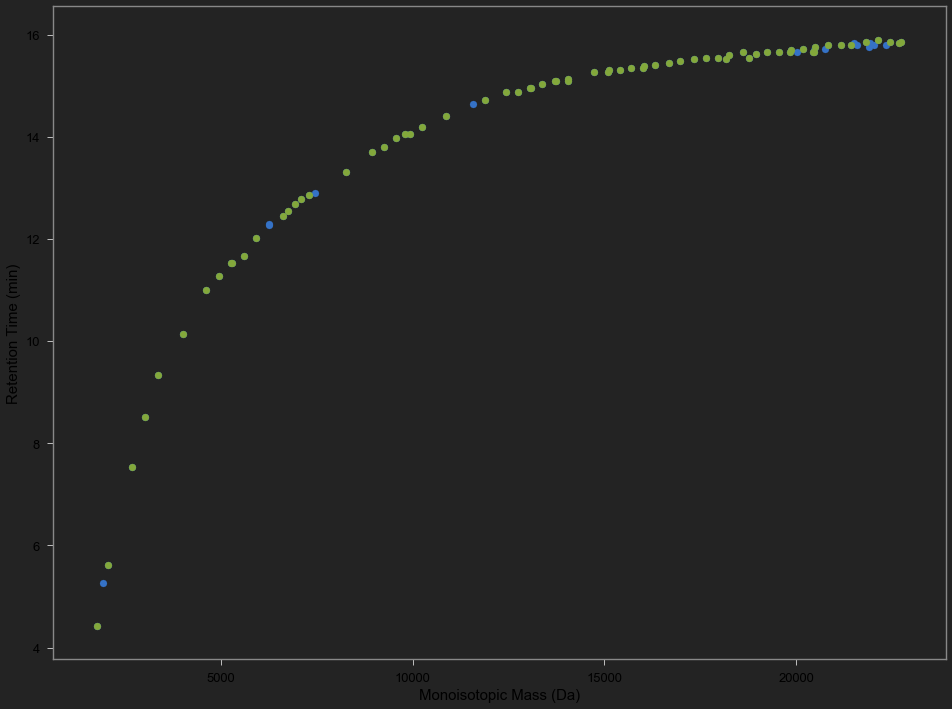

In [70]:
plot_zones(df_5p_cca_ref, df_5p_cca_ref[df_5p_cca_ref.Hit>2])

mass_x (77,) mass_y (77,)


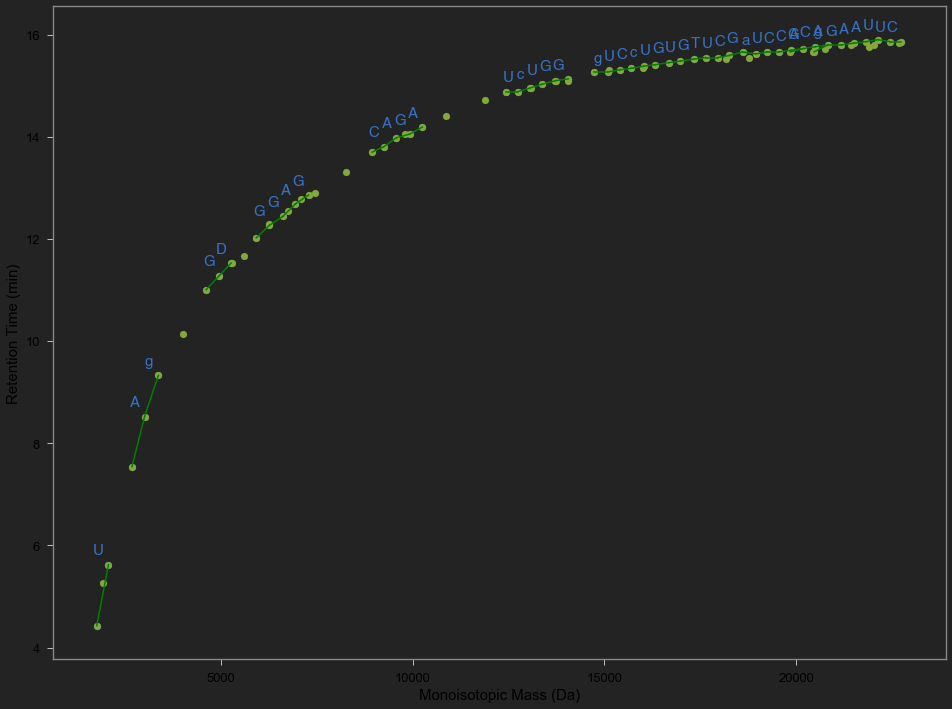

In [77]:
bcr = base_calling_random(df_5p_cca_ref[df_5p_cca_ref.Hit > 1])
plt, _ = plot_basecalling(*bcr, annotate=False)
tmp = df_5p_cca_ref[df_5p_cca_ref.Hit>1]
plt.scatter(tmp.Mass, tmp.RT)

In [122]:
px.scatter(df_5p_cca_ref, x='Mass', y='RT')

# Put Mass Ladder into Seats

In [59]:
df_5p_cca_ref[df_5p_cca_ref.Hit==0]

,Unnamed: 0,Mass,RT,Vol,Hit
3587,5778,21167.877829,15.805322,562342.12,0
3592,5783,21585.084318,15.805322,581348.45,0
3595,5786,21891.082340,15.770094,107555.88,0
3372,5549,15117.048924,15.317506,28130.74,0
375,1116,1931.244152,5.266764,1196.97,0
2977,5004,9805.351515,14.058834,79205.25,0
3553,5744,20010.801274,15.669279,22884.22,0


In [121]:
df_5p_cca_ref.to_excel('/Users/bryan/Documents/Presentations/Feb 3 2021/phe_5p_cca_ref.xlsx')

In [123]:
tmp = df_5p_cca_ref
process_mass_seats(tmp, full_mass)

,Mass
position,
1,
2,
3,
4,
5,1767.21
6,
7,
8,2685.29
9,3014.34


# Fill in the Gap

In [80]:
df_5p.head()

,Unnamed: 0,Mass,RT,Vol
0,2,554.583866,0.582532,19978.23
1,5,559.072187,0.475447,74629.97
2,6,559.975463,0.545651,83293.07
3,9,563.993483,0.582532,126281.74
4,13,570.140804,0.475447,130230.49


In [89]:
TAG_5P = 79.9663
TAG_3OH = 18.0106

df_sample = df_5p_cca_ref
df_sample = df_sample.sort_values('Mass')
idxs = list()
gap_idxs = list()
for idx, row in df_sample.iterrows():
    print('Processing {}'.format(row.Mass))
    columns = ['Mass', 'RT', 'Vol']
    df_ends = pd.DataFrame(index=[0, 1], columns=columns)
    if not idxs:
        # handle gap between TAG and the first dot
        pre = TAG_5P + TAG_3OH
        df_ends.iloc[0] = [pre, 0.001, 0]
#         df_ends.iloc[0]['Mass'] = pre
#         df_ends.iloc[0]['RT'] = 0
#         df_ends.iloc[0]['Vol'] = 0
    else:
        pre = df_sample.loc[idxs[-1]].Mass
        df_ends.iloc[0] = df_sample.loc[idxs[-1]][columns]
    res = components(row.Mass - pre)
    if not res.empty:
        # keep this dot, and fill in the gap
        idxs.append(idx)
        
        df_ends.iloc[1] = row[columns]
        print(df_ends, df_ends.info())
        df_ends = df_ends.astype(float)
        df_alones = standalone_dots(df_5p, df_ends)
        print(df_alones)

Processing 1767.2130355644
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 3 columns):
Mass    2 non-null object
RT      2 non-null object
Vol     2 non-null object
dtypes: object(3)
memory usage: 64.0+ bytes
      Mass       RT          Vol
0  97.9769    0.001            0
1  1767.21  4.42762  1.31583e+07 None
Processing the gap 97.9769-1767.2130355644, 113 dots
     Unnamed: 0         Mass        RT          Vol
23          181   748.065968  0.719845   1227461.17
67          493  1093.112225  1.067582   2309549.37
74          511  1133.119125  1.067582     24365.61
176         725  1408.062216  0.787332      7843.46
184         736  1438.160452  2.401147  10399553.28
     Unnamed: 0         Mass        RT          Vol
23          181   748.065968  0.719845   1227461.17
67          493  1093.112225  1.067582   2309549.37
74          511  1133.119125  1.067582     24365.61
176         725  1408.062216  0.787332      7843.46
184         736  1438.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 3 columns):
Mass    2 non-null object
RT      2 non-null object
Vol     2 non-null object
dtypes: object(3)
memory usage: 64.0+ bytes
      Mass       RT          Vol
0  10879.5  14.4039  5.43756e+06
1  11567.6  14.6491  4.76769e+06 None
Processing the gap 10879.4821999753-11567.5825235551, 0 dots
No dots found in these gaps.
Empty DataFrame
Columns: []
Index: []
Processing 11896.6424081803
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 3 columns):
Mass    2 non-null object
RT      2 non-null object
Vol     2 non-null object
dtypes: object(3)
memory usage: 64.0+ bytes
      Mass       RT          Vol
0  11567.6  14.6491  4.76769e+06
1  11896.6  14.7199  5.40455e+06 None
Processing the gap 11567.5825235551-11896.6424081803, 0 dots
No dots found in these gaps.
Empty DataFrame
Columns: []
Index: []
Processing 12437.7079581601
Processing 12743.7351502915
Processi

Processing 22438.0083600798
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 3 columns):
Mass    2 non-null object
RT      2 non-null object
Vol     2 non-null object
dtypes: object(3)
memory usage: 64.0+ bytes
    Mass       RT     Vol
0  21826  15.8703  120029
1  22438  15.8703  197891 None
Processing the gap 21825.9594354813-22438.0083600798, 1 dots
No dots found in these gaps.
Empty DataFrame
Columns: []
Index: []
Processing 22668.1480576235
Processing 22743.0644675686


In [88]:
%run ../modules/utils.ipynb

In [104]:
df_m = pd.read_excel('/Users/bryan/Documents/Presentations/Jan 27 2021/merged_cca_cc_5p.xlsx')

mass_x (218,) mass_y (218,)


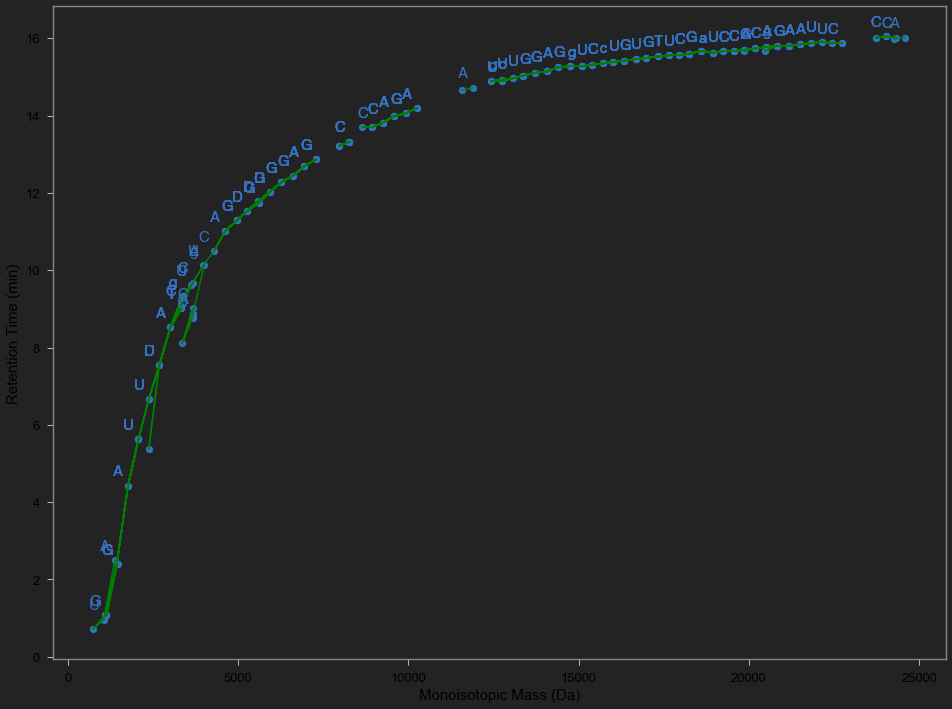

In [107]:
bcr = base_calling_random(df_m.drop_duplicates())
plt, _ = plot_basecalling(*bcr, annotate=False)
plt.savefig('/Users/bryan/Documents/Presentations/Jan 27 2021/merged_cca_cc_5p_basecalls.png', transparent=True)